https://pandas.pydata.org/docs/reference/index.html

https://aprendeconalf.es/docencia/python/manual/pandas/



# 2. Librería Pandas
Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

Las principales características de esta librería son:

Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.
Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
Permite acceder a los datos mediante índices o nombres para filas y columnas.
Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
Permite trabajar con series temporales.
Realiza todas estas operaciones de manera muy eficiente.



## 2.1. Tipos de datos de Pandas


Pandas dispone de tres estructuras de datos diferentes:

- **Series**: Estructura de una dimensión.
- **DataFrame**: Estructura de dos dimensiones (tablas).
- **Panel**: Estructura de tres dimensiones (cubos).

Estas estructuras se construyen a partir de arrays de la librería NumPy, añadiendo nuevas funcionalidades.

In [1]:
# primero importaremos la librería de panda
import pandas as pd

# habrá ejemplos de uso de la librería numPy
import numpy as np

## 2.2 Series en Pandas

Una Serie es un array de una dimensión con etiquetas. Son homogéneos, es decir, sus elementos tienen que ser del mismo tipo, y su tamaño no se puede cambiar, aunque sí su contenido.

Puede contener información de cualquier tipo. Las etiquetas se conocen como **índice**.
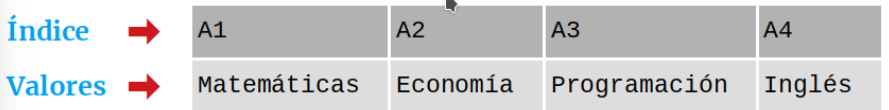

### 2.2.1. Construcción de objetos de tipo Serie

In [8]:
#podemos crear una serie con los siguientes valores utilizando la función Series de pd
#creacion de una serie a partir de un array: Series(data=lista, index=indices, dtype=tipo)
s1 = pd.Series([1,2,3,5,-3])
type(s1)

pandas.core.series.Series

In [9]:
#si queremos mostrar los valores junto con los índices podemos usar print
print(s1)

#si por el contrario solo nos interesan los valores
print(s1.values)

#si queremos ver información del índice
print(s1.index)

0    1
1    2
2    3
3    5
4   -3
dtype: int64
[ 1  2  3  5 -3]
RangeIndex(start=0, stop=5, step=1)


In [10]:
# podemos pasar como argumento un array previamente construido
x = [1,2,3,5,-3]
s3 = pd.Series(x)

In [11]:
# También podemos pasar un ndarray de NumPy como argumento
y = np.array(x)
s4 = pd.Series(y)

In [12]:
# Podemos definir un Series con un indice definido por nosotros
s5 = pd.Series(x, index= ['a', 'b', 'c', 'd', 'e'])
print(s5)

a    1
b    2
c    3
d    5
e   -3
dtype: int64


In [13]:
# Podemos definir una Serie a partir  de un diccionario
# Series(data=diccionario, index=indices)
dic={'Matematicas': 5 , 'Lengua': 8, 'Programación' : 10}
s6 = pd.Series(dic)
print(s6)

Matematicas      5
Lengua           8
Programación    10
dtype: int64


### 2.2.2  Indexando

In [21]:
# acceso por posicion
print(s5)
print("el valor del elemento en la posicion 2: ", s5[2])

a    1
b    2
c    3
d    5
e   -3
dtype: int64
el valor del elemento en la posicion 2:  3


In [22]:
# acceso por indice
print(s5)
print("el valor del elemento en el indice 'd': ", s5['d'])

a    1
b    2
c    3
d    5
e   -3
dtype: int64
el valor del elemento en el indice 'd':  5


### 2.2.3 Operaciones básicas con series

In [24]:
# podemos mostrar aquellos números negativos de la siguiente forma
print(s5[s5<0])

# de la misma forma se pueden obtener los positivos
print(s5[s5>0])

e   -3
dtype: int64
a    1
b    2
c    3
d    5
dtype: int64


In [25]:
# se puede obtener el valor de una serie multiplicando sus valores por una constante
c = 2
print(s5 * c)

a     2
b     4
c     6
d    10
e    -6
dtype: int64


In [26]:
# también se pueden multiplicar dos Series con el mismo índice
s6 = pd.Series([1,2,3,5,-3, 1], index= ['a', 'b', 'c', 'd', 'e', 'f']) #tiene una componente más que s5

print(s5.values)
print(s6.values)

print(s5.multiply(s6, fill_value=0)) #se puede definir un valor por defecto para NaN

[ 1  2  3  5 -3]
[ 1  2  3  5 -3  1]
a     1.0
b     4.0
c     9.0
d    25.0
e     9.0
f     0.0
dtype: float64


In [27]:
# La función "describe" es muy útil, pues nos devuelve los datos estadísticos principales de la distribución de datos
s = pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [28]:
# Se puede mostrar información básica de una serie no numérica
s = pd.Series(['a', 'a', 'b', 'c'])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

In [29]:
# también se pueden obtener los valores por separado
s = pd.Series([1, 2, 3])
print(s.count())
print(s.mean())
print(s.std())
print(s.min())
print(s.quantile([0.25,0.5,0.75]).values)
print(s.max())


3
2.0
1.0
1
[1.5 2.  2.5]
3


In [35]:
# ordenar los valores de una serie de forma descendente
print(s5)
print(s5.sort_values(ascending=False))

# ordenar los indices de una serie de forma descendente
print(s5.sort_index(ascending=True))

a    1
b    2
c    3
d    5
e   -3
dtype: int64
d    5
c    3
b    2
a    1
e   -3
dtype: int64
a    1
b    2
c    3
d    5
e   -3
dtype: int64


## 2.3. Dataframes en Pandas

Un objeto del tipo DataFrame define un conjunto de datos estructurado en forma de tabla donde cada columna es un objeto de tipo Series, es decir, todos los datos de una misma columna son del mismo tipo, y las filas son registros que pueden contender datos de distintos tipos.

Un DataFrame contiene dos índices, uno para las filas y otro para las columnas, y se puede acceder a sus elementos mediante los nombres de las filas y las columnas.

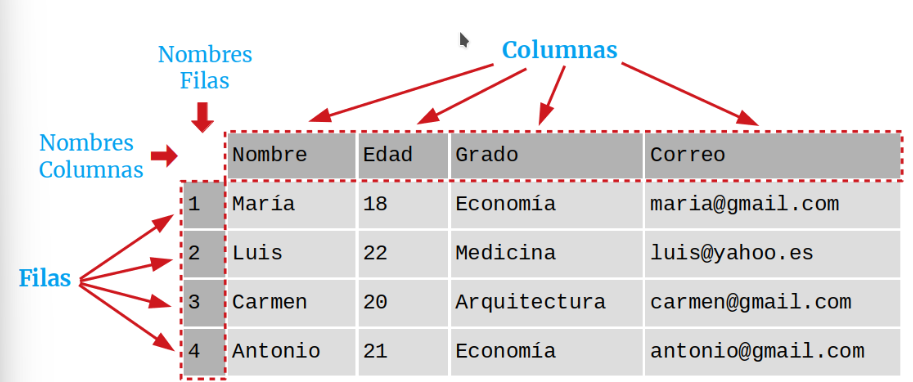

### 2.3.1. Construcción de objetos de tipo Dataframe

In [37]:
# se puede crear un objeto de tipo Dataframe a partir de una lista de listas
df = pd.DataFrame([['María', 18], ['Luis', 22], ['Carmen', 20]], columns=['Nombre', 'Edad'])
print(df)

   Nombre  Edad
0   María    18
1    Luis    22
2  Carmen    20


In [38]:
# se puede crear un objeto de tipo Dataframe a partir de un array
df2 = pd.DataFrame(np.random.randn(4, 3), columns=['a', 'b', 'c'])
print(df2)

          a         b         c
0  0.483499 -0.446439 -0.474857
1 -0.790820  0.379256  0.609496
2  1.246555 -0.635438  1.311451
3  1.250704  1.202201 -0.090142


In [ ]:
# se puede crear un objeto de tipo Dataframe a partir de un diccionario
# DataFrame(data=diccionario, index=listaFilas, columns=listaColumnas, dtype=tipos)
# Si no se pasa la lista de filas se utilizan como nombres los enteros empezando en 0.
# Si no se pasa la lista de columnas se utilizan como nombres las claves del diccionario.
data = {'city': ['Mumbai', 'Mumbai', 'Mumbai', 'Hyderabad', 'Hyderabad', 'Hyderabad'],
        'year': [2010, 2011, 2012, 2010, 2011, 2012,],
        'population': [10.0, 10.1, 10.2, 5.2, 5.3, 5.5]}

df1 = pd.DataFrame(data)
print(df1)

# muchas veces el dataframe ocupa mucho en pantalla y únicamente nos interesa ver los primeros/últimos valores
print()
print(df1.head())
print()
print(df1.tail())

        city  year  population
0     Mumbai  2010        10.0
1     Mumbai  2011        10.1
2     Mumbai  2012        10.2
3  Hyderabad  2010         5.2
4  Hyderabad  2011         5.3
5  Hyderabad  2012         5.5

        city  year  population
0     Mumbai  2010        10.0
1     Mumbai  2011        10.1
2     Mumbai  2012        10.2
3  Hyderabad  2010         5.2
4  Hyderabad  2011         5.3

        city  year  population
1     Mumbai  2011        10.1
2     Mumbai  2012        10.2
3  Hyderabad  2010         5.2
4  Hyderabad  2011         5.3
5  Hyderabad  2012         5.5


In [ ]:
# también se puede definir un orden concreto de las columnas en la creación
df2 = pd.DataFrame(data, columns=['year', 'city', 'population'])
print(df2)

   year       city  population
0  2010     Mumbai        10.0
1  2011     Mumbai        10.1
2  2012     Mumbai        10.2
3  2010  Hyderabad         5.2
4  2011  Hyderabad         5.3
5  2012  Hyderabad         5.5


In [ ]:
# es importante muchas veces el definir etiquetas también en el índice

df3 = pd.DataFrame(data, columns=['year', 'city', 'population'],
                         index = ['one', 'two', 'three', 'four', 'five', 'six'])

print(df3)
print()

# podemos obtener los valores de las columnas
print(df3.columns)
#print(df3.columns.values)
print()

# podemos obtener los valores de los indices
print(df3.index)
#print(df3.index.values)
print()

# si queremos acceder a una columna podemos ejecutar
print(df3['year'])
# print(df3.year) #es una alternativa válida
print()

# si queremos acceder a una fila podemos ejecutar
print(df3.loc['one'])

       year       city  population
one    2010     Mumbai        10.0
two    2011     Mumbai        10.1
three  2012     Mumbai        10.2
four   2010  Hyderabad         5.2
five   2011  Hyderabad         5.3
six    2012  Hyderabad         5.5

Index(['year', 'city', 'population'], dtype='object')

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

one      2010
two      2011
three    2012
four     2010
five     2011
six      2012
Name: year, dtype: int64

year            2010
city          Mumbai
population      10.0
Name: one, dtype: object


In [ ]:
# se puede construir un DataFrame con una nueva columna (por ejemplo, GDP)
df3_bis= pd.DataFrame(data, columns=['year', 'city', 'population', 'GDP'],
                         index = ['one', 'two', 'three', 'four', 'five', 'six'])

#veremos que los valores se inicializan como NaN
print(df3_bis['GDP'])

one      NaN
two      NaN
three    NaN
four     NaN
five     NaN
six      NaN
Name: GDP, dtype: object


In [ ]:
#se le puede asignar a la columna un único valor
df3_bis['GDP'] = 1
print(df3_bis['GDP'])
print()


#se le puede asignar a la columna un conjunto valores
df3_bis['GDP'] = [3, 2, 0, 9, -0.4, 7] #cuidado con el número de elementos
print(df3_bis['GDP'])
print()

#podemos utilizar funciones de la librería numPy
df3_bis['GDP'] = np.arange(6)
print(df3_bis['GDP'])
print()

one      1
two      1
three    1
four     1
five     1
six      1
Name: GDP, dtype: int64

one      3.0
two      2.0
three    0.0
four     9.0
five    -0.4
six      7.0
Name: GDP, dtype: float64

one      0
two      1
three    2
four     3
five     4
six      5
Name: GDP, dtype: int64



### 2.3.2 Ver información general de los Dataframe

In [ ]:
#Dataframe de ejemplo

myarray = np.array([[10,30,20], [50,40,60],[1000,2000,3000]])
rownames = ['lentejas', 'espinacas', 'cerveza']
colnames = ['enero', 'febrero', 'marzo']
mydf = pd.DataFrame(myarray, index=rownames, columns=colnames)
print("Compras:")
print(mydf)

Compras:
           enero  febrero  marzo
lentejas      10       30     20
espinacas     50       40     60
cerveza     1000     2000   3000


In [ ]:
print("Número de filas:")
print(mydf.shape[0])
print()
print("Número de columnas:")
print(mydf.shape[1])
print("Número de filas y columnas:")
print(mydf.shape)

Número de filas:
3

Número de columnas:
3
Número de filas y columnas:
(3, 3)


In [ ]:
#También podemos consultar los nombres o etiquetas de filas o columnas, que son los valores que habíamos asignado a los índices, así como el tipo de valor que son.
print("Columnas:")
print(mydf.columns)
print()
print("Column types:")
print(mydf.dtypes)

Columnas:
Index(['enero', 'febrero', 'marzo'], dtype='object')

Column types:
enero      int64
febrero    int64
marzo      int64
dtype: object


In [ ]:
# En los Dataframe también podemos usar la función "describe"
print("Valores estadísticos de los datos:")
print(mydf.describe())


Valores estadísticos de los datos:
             enero      febrero        marzo
count     3.000000     3.000000     3.000000
mean    353.333333   690.000000  1026.666667
std     560.386771  1134.504297  1709.073823
min      10.000000    30.000000    20.000000
25%      30.000000    35.000000    40.000000
50%      50.000000    40.000000    60.000000
75%     525.000000  1020.000000  1530.000000
max    1000.000000  2000.000000  3000.000000


### 2.3.3 Fichero CSV o Excel

In [39]:
#Creacion de un dataframe a partir de un fichero CSV
#Leer información almacenada en CSV desde una url
df = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv')
df.head(5)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [42]:
#Exportación de ficheros
df.to_csv('fichero.csv')


### 2.3.4. Formato JSON

#### Serializar información en JSON

In [46]:
#Usaremos el siguiente dataframe como estructura para crear JSON
df = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])
print(df)

      col 1 col 2
row 1     a     b
row 2     c     d


In [47]:
# json utilizando formato split
# split : dict like {‘index’ -> [index], ‘columns’ -> [columns], ‘data’ -> [values]}
jsonSplit = df.to_json(orient='split')
print(jsonSplit)

{"columns":["col 1","col 2"],"index":["row 1","row 2"],"data":[["a","b"],["c","d"]]}


In [48]:
# json utilizando formato index
# index : dict like {index -> {column -> value}}
jsonIndex = df.to_json(orient='index')
print(jsonIndex)

{"row 1":{"col 1":"a","col 2":"b"},"row 2":{"col 1":"c","col 2":"d"}}


In [49]:
# json utilizando formato records
# records : list like [{column -> value}, … , {column -> value}]
jsonRecords = df.to_json(orient='records')
print(jsonRecords)

[{"col 1":"a","col 2":"b"},{"col 1":"c","col 2":"d"}]


#### Leer información en JSON

In [50]:
import io

#si la información viene con formato split
dfSplit = pd.read_json(jsonSplit, orient="split")
print(dfSplit)

      col 1 col 2
row 1     a     b
row 2     c     d


In [51]:
#si la información viene con formato index
dfIndex = pd.read_json(jsonIndex, orient="index")
print(dfIndex)

      col 1 col 2
row 1     a     b
row 2     c     d


In [52]:
#si la información viene con formato index
dfRecords = pd.read_json(jsonRecords, orient="records")
print(dfRecords) #En este ultimo puedes ver como se pierde el valor de las cadenas del índice (no venía en el json)

  col 1 col 2
0     a     b
1     c     d
